<a href="https://colab.research.google.com/github/LuziaAm/DataScience/blob/main/Aula2_ML_INDT_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clusterização

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np


In [171]:
#Determinar o numer de clusters
#Obter e salvar o modelo
#Criar um módulo de inferência com os clusters

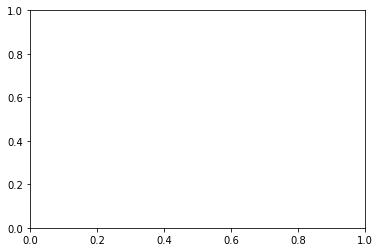

In [172]:
#preparar os objetos para plotar o gráfico
fig, ax = plt.subplots()

In [173]:
dados =  pd.read_csv('/content/iris.csv')

In [174]:
dados=dados.drop(columns='species')#somente ayributos numericos

Obter modelo de Cluusters com a base Iris

In [175]:
dados=dados.values

In [176]:
dados

array([[1. , 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [177]:
kmeansModel = KMeans(n_clusters=3).fit(dados)

In [178]:
Iris_clusters = kmeansModel.fit_transform(dados)

In [179]:
kmeansModel.cluster_centers_ #médias das colunas da petala e cepala

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [4.924     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [180]:
#Descobrir o número ideal de clusters
#Método das distorções
#Dica: Todo método se apoia na avaliação do erro

In [181]:
distorcoes=[]#Matriz para gravar as distorções

In [182]:
k= range(1,11)
for n in k:
  kmeansModel = KMeans(n_clusters=n).fit(dados)
  distorcoes.append(
      sum(np.min(
          cdist(dados, kmeansModel.cluster_centers_,'euclidean'), axis=1)/dados.shape[0]
      )
  )

In [183]:
distorcoes

[1.9618657405842204,
 0.8819856769582625,
 0.676350413034968,
 0.5860855744781953,
 0.5575716736741386,
 0.5126911292142622,
 0.4651021464736337,
 0.43654354733929684,
 0.40837413929574773,
 0.3949694228515891]

In [184]:
ax.plot(k, distorcoes)
ax.set(xlabel='n Clusters', ylabel='Distorcao', title='Elbow por distorção')
ax.grid()
fig.savefig('elbow_distorcao.png')
plt.show()

In [185]:
#Até aqui caculamos as distorções

#Agora calcular o número de ótimos grupos

In [186]:
#Requisito: Possuir a matriz que representa os erros(distorcoes ou soma dos qradrados)
#Medidas de inercia de cada modelo avaliado

In [187]:
soma_quadrados = [] #vetor com as somas dos quadrados dos erros de cada cluster

In [188]:
k= range(2,100)
for n in k:
  kmeansModel = KMeans(n_clusters=n).fit(dados)
  soma_quadrados.append(kmeansModel.inertia_)

In [189]:
#Definir o n_clusters ótimo

In [190]:
x1 = 2 #é o primeiro valor do intervalo de n_clusters testados
y1 = soma_quadrados[0] #primeira inercia

In [191]:
x2 = 20 #ultimo valor de n_clusters testados
y2 = soma_quadrados[len(soma_quadrados)-1]

In [192]:
import math

In [196]:
distancias = [] #maior distancia
for i in range(len(soma_quadrados)):
  x0 =  i + 2
  y0 = soma_quadrados[i]
  numerador = abs((y2-y1) * x0 - (x2-x1) *y0 + x2 * y1 * x1)
  denominador = math.sqrt((y2-y1)**2 + (x2-x1)**2)
  distancias.append(numerador/denominador)

n_clusters_otimo =  distancias.index(max(distancias)) + 2 # 1 é o deslocamento do primeiro numero de cluster avaliado

In [197]:
distancias

[20.0177474204283,
 26.890626241393623,
 28.209673408003624,
 28.898766620760288,
 29.034961676505002,
 28.883994896824113,
 28.402960560007088,
 27.8703126447977,
 27.089207115689927,
 26.294868129460472,
 25.48937272771528,
 24.611432925343028,
 23.762191081291277,
 22.95334307601,
 22.078024123518638,
 21.163867009116395,
 20.273790090851776,
 19.348590850425303,
 18.467036197306058,
 17.53985757840114,
 16.59819440317575,
 15.689464487361334,
 14.754805208817185,
 13.82236686073776,
 12.893262189752566,
 11.898218741335247,
 10.972199405102938,
 10.015736090193036,
 9.04131469296628,
 8.09311444842159,
 7.133094221334788,
 6.148747383612992,
 5.218359969956199,
 4.243439481804428,
 3.29562972327666,
 2.3272803247573837,
 1.3500821283337816,
 0.406143028339219,
 0.5581939469655745,
 1.5239862901642172,
 2.4993197126863587,
 3.48327224175054,
 4.4728998554644654,
 5.445717103519407,
 6.414091081677804,
 7.371217985907859,
 8.364608302739112,
 9.333916809537683,
 10.28173982246271,
 1

In [198]:
n_clusters_otimo

99